In [65]:
import pandas as pd
import numpy as np

### Unify country names

In [66]:
country_name_changes = {'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
'Viet Nam': 'Vietnam',
 'United States of America': 'United States',
 'United Republic of Tanzania': 'Tanzania',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
 'Slovakia': 'Slovak Republic',
 'Saint Lucia': 'St. Lucia',
 'Republic of Moldova': 'Moldova',
 "Democratic People's Republic of Korea":'Korea, Dem. People’s Rep.', 
 'Republic of Korea':'Korea, Rep.',
 'Kyrgyzstan': 'Kyrgyz Republic',
 'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
 'Gambia': 'Gambia, The',
 'Egypt': 'Egypt, Arab Rep.',
  "Côte d'Ivoire": "Cote d'Ivoire",
 'China, Hong Kong SAR': 'Hong Kong SAR, China',
 'China, Macao SAR':'Macao SAR, China',
 'China, mainland': 'China',
 'Bolivia (Plurinational State of)':'Bolivia',
 'Bahamas':'Bahamas, The',
 'Yemen': 'Yemen, Rep.'
}
def change_to_match_name(name):
    if name in country_name_changes.keys():
        return country_name_changes[name]
    else:
        return name

### Get the country codes (from FAO_Consumption dataset)

In [67]:
countries = pd.read_csv("FAO_Consumption.csv")

In [68]:
country_names = countries[["Country Name"]].dropna().drop_duplicates()

In [69]:
country_names

,Country Name
0,Afghanistan
5,Albania
10,Algeria
15,Angola
20,Antigua and Barbuda
...,...
845,Venezuela (Bolivarian Republic of)
850,Viet Nam
855,Yemen
860,Zambia


### Filter Country by GDP (Above average)

In [70]:
gdp = pd.read_csv("gdp.csv")
average_gdp = 14874.942844032059

In [71]:
gdp_filtered = gdp.melt(id_vars=["Unnamed: 0", "Country Name", "Country Code"], var_name="Year", value_name="GDP")
gdp_filtered = gdp_filtered.loc[gdp_filtered['Year'].isin(['2014', '2015', '2016', '2017'])]
gdp_filtered = gdp_filtered.loc[(gdp_filtered['GDP'] != "..")]
gdp_filtered = gdp_filtered[gdp_filtered['GDP'].notnull()].copy()
gdp_filtered["GDP"] = gdp_filtered["GDP"].astype(float)
gdp_filtered = gdp_filtered.groupby(['Country Name']).mean().reset_index()

gdp_filtered_above = gdp_filtered.loc[(gdp_filtered['GDP'] >= average_gdp)]
gdp_filtered_below = gdp_filtered.loc[(gdp_filtered['GDP'] < average_gdp)]


gdp_filtered_above["Country Name"] = gdp_filtered_above["Country Name"].apply(change_to_match_name)
gdp_filtered_below["Country Name"] = gdp_filtered_below["Country Name"].apply(change_to_match_name)
gdp_filtered_above = gdp_filtered_above.drop(['Unnamed: 0', 'GDP'], axis=1)
gdp_filtered_below = gdp_filtered_below.drop(['Unnamed: 0', 'GDP'], axis=1)

<ipython-input-71-fffceea5c530>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_filtered_above["Country Name"] = gdp_filtered_above["Country Name"].apply(change_to_match_name)
<ipython-input-71-fffceea5c530>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_filtered_below["Country Name"] = gdp_filtered_below["Country Name"].apply(change_to_match_name)


### Population density dataset

In [72]:
pop_dens = pd.read_csv("pop_dens_2014_2017.csv")
pop_dens

,Unnamed: 0,Country Name,2014,2015,2016,2017
0,0,Aruba,576.522222,579.672222,582.622222,585.366667
1,1,Afghanistan,51.114778,52.712071,54.197114,55.595993
2,2,Angola,21.610475,22.366553,23.135064,23.916538
3,3,Albania,105.441752,105.135146,104.967190,104.870693
4,4,Andorra,168.538298,165.980851,164.461702,163.831915
...,...,...,...,...,...,...
258,259,Kosovo,166.507853,164.250574,163.273353,164.508404
259,260,"Yemen, Rep.",48.910895,50.188247,51.457867,52.720459
260,261,South Africa,44.964505,45.657261,46.330985,46.987817
261,262,Zambia,20.715577,21.360741,22.012009,22.671395


Filter the countries

### Depression dataset

In [73]:
depression = pd.read_csv("depression.csv")

In [74]:
depression_filtered = depression.loc[depression['Year'].isin(['2014', '2015', '2016', '2017'])]
depression_filtered = depression_filtered[depression_filtered['Year'].notnull()].copy()
depression_filtered["Year"] = depression_filtered["Year"].astype(str)
depression_filtered["Country Name"] = depression_filtered["Country Name"].apply(change_to_match_name)

In [75]:
depression_filtered

,Unnamed: 0,Country Name,Year,Depression Count
24,24,Afghanistan,2014,884404.683172
25,25,Afghanistan,2015,906133.433945
26,26,Afghanistan,2016,932188.730746
27,27,Afghanistan,2017,967281.203243
52,52,Albania,2014,68970.473430
...,...,...,...,...
6439,6439,Zambia,2017,438079.199268
6464,6464,Zimbabwe,2014,311665.769283
6465,6465,Zimbabwe,2015,320638.507158
6466,6466,Zimbabwe,2016,330437.353798


## Correlation for depression and population density for countries above the average GDP

In [76]:
pop_dens_filtered_above = pd.merge(gdp_filtered_above, pop_dens, left_on=['Country Name'], right_on=['Country Name'], how='left')

In [77]:
pop_dens_filtered_above = pop_dens_filtered_above.melt(id_vars=["Unnamed: 0", "Country Name"], var_name="Year", value_name="Density")

In [78]:
pop_dens_filtered_above

,Unnamed: 0,Country Name,Year,Density
0,4,Andorra,2014,168.538298
1,0,Aruba,2014,576.522222
2,11,Australia,2014,3.055815
3,12,Austria,2014,103.563322
4,21,"Bahamas, The",2014,37.026274
...,...,...,...,...
291,79,United Kingdom,2017,273.049473
292,249,United States,2017,35.527563
293,248,Uruguay,2017,19.635733
294,252,"Venezuela, RB",2017,33.320570


### Merge population density and depression datasets on Country and Year

In [79]:
pop_dens_depression_above = depression_filtered.merge(pop_dens_filtered_above, left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], how='right')

In [80]:
pop_dens_depression_above

,Unnamed: 0_x,Country Name,Year,Depression Count,Unnamed: 0_y,Density
0,164.0,Andorra,2014,3.168901e+03,4,168.538298
1,165.0,Andorra,2015,3.216876e+03,4,165.980851
2,166.0,Andorra,2016,3.245706e+03,4,164.461702
3,167.0,Andorra,2017,3.339036e+03,4,163.831915
4,332.0,Australia,2014,1.054482e+06,11,3.055815
...,...,...,...,...,...,...
291,NaN,Sint Maarten (Dutch part),2017,NaN,223,1193.352941
292,NaN,St. Kitts and Nevis,2017,NaN,123,200.138462
293,NaN,Turks and Caicos Islands,2017,NaN,226,39.068421
294,NaN,"Venezuela, RB",2017,NaN,252,33.320570


In [81]:
pop_dens_depression_above = pop_dens_depression_above.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [82]:
pop_dens_depression_above.columns

Index(['Country Name', 'Year', 'Depression Count', 'Density'], dtype='object')

In [83]:
pop_dens_depression_above_by_country = pop_dens_depression_above.groupby(['Country Name']).mean().reset_index()

In [84]:
pop_dens_depression_above_by_country.columns

Index(['Country Name', 'Depression Count', 'Density'], dtype='object')

In [85]:
pop_dens_depression_above_by_country.fillna(pop_dens_depression_above_by_country["Depression Count"].mode()[0], inplace = True)

In [86]:
pop_dens_depression_above_by_country

,Country Name,Depression Count,Density
0,Andorra,3.242630e+03,165.703192
1,Aruba,1.574117e+03,581.045833
2,Australia,1.066378e+06,3.124806
3,Austria,3.191915e+05,105.195644
4,"Bahamas, The",9.898780e+03,37.575699
...,...,...,...
69,United Kingdom,2.878980e+06,270.108057
70,United States,1.524408e+07,35.170109
71,Uruguay,1.234121e+05,19.530941
72,"Venezuela, RB",1.574117e+03,33.831288


### Scatter plots

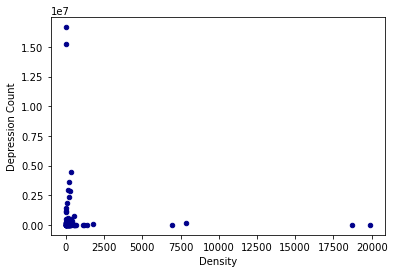

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


ax1 = pop_dens_depression_above_by_country.plot.scatter(x='Density', y='Depression Count', c='DarkBlue')

### Correlation Coefficient

In [88]:
# calculate the correlation matrix
corr = pop_dens_depression_above_by_country.corr()
corr.loc['Depression Count']

Depression Count    1.000000
Density            -0.075224
Name: Depression Count, dtype: float64

## Correlation for depression and population density for countries below the average GDP

In [89]:
pop_dens_filtered_below = pd.merge(gdp_filtered_below, pop_dens, left_on=['Country Name'], right_on=['Country Name'], how='left')

In [90]:
pop_dens_filtered_below = pop_dens_filtered_below.melt(id_vars=["Unnamed: 0", "Country Name"], var_name="Year", value_name="Density")

In [91]:
pop_dens_filtered_below

,Unnamed: 0,Country Name,Year,Density
0,1,Afghanistan,2014,51.114778
1,3,Albania,2014,105.441752
2,58,Algeria,2014,16.342542
3,9,American Samoa,2014,278.955000
4,2,Angola,2014,21.610475
...,...,...,...,...
711,194,West Bank and Gaza,2017,740.000831
712,257,World,2017,57.781638
713,260,"Yemen, Rep.",2017,52.720459
714,262,Zambia,2017,22.671395


### Merge population density and depression datasets on Country and Year

In [92]:
pop_dens_depression_below = depression_filtered.merge(pop_dens_filtered_below, left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], how='right')

In [93]:
pop_dens_depression_below

,Unnamed: 0_x,Country Name,Year,Depression Count,Unnamed: 0_y,Density
0,24.0,Afghanistan,2014,884404.683172,1,51.114778
1,25.0,Afghanistan,2015,906133.433945,1,52.712071
2,26.0,Afghanistan,2016,932188.730746,1,54.197114
3,27.0,Afghanistan,2017,967281.203243,1,55.595993
4,52.0,Albania,2014,68970.473430,3,105.441752
...,...,...,...,...,...,...
711,NaN,Sub-Saharan Africa (excluding high income),2017,NaN,213,43.973942
712,NaN,Timor-Leste,2017,NaN,235,83.608675
713,NaN,Tuvalu,2017,NaN,243,379.000000
714,NaN,Upper middle income,2017,NaN,247,48.874586


In [94]:
pop_dens_depression_below = pop_dens_depression_below.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [95]:
pop_dens_depression_below.columns

Index(['Country Name', 'Year', 'Depression Count', 'Density'], dtype='object')

In [96]:
pop_dens_depression_below_by_country = pop_dens_depression_below.groupby(['Country Name']).mean().reset_index()

In [97]:
pop_dens_depression_below_by_country.columns

Index(['Country Name', 'Depression Count', 'Density'], dtype='object')

In [98]:
pop_dens_depression_below_by_country.fillna(pop_dens_depression_below_by_country["Depression Count"].mode()[0], inplace = True)

In [99]:
pop_dens_depression_below_by_country

,Country Name,Depression Count,Density
0,Afghanistan,9.225020e+05,53.404989
1,Albania,6.930178e+04,105.103695
2,Algeria,1.362142e+06,16.856611
3,American Samoa,1.463210e+03,278.705000
4,Angola,7.862751e+05,22.757157
...,...,...,...
174,West Bank and Gaza,1.463210e+03,717.000955
175,World,2.584092e+08,56.819162
176,"Yemen, Rep.",9.131212e+05,50.819367
177,Zambia,4.082987e+05,21.689930


### Scatter plots

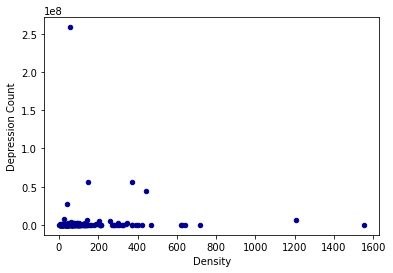

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


ax1 = pop_dens_depression_below_by_country.plot.scatter(x='Density', y='Depression Count', c='DarkBlue')

### Correlation Coefficient

In [101]:
# calculate the correlation matrix
corr = pop_dens_depression_below_by_country.corr()
corr.loc['Depression Count']

Depression Count    1.000000
Density             0.022707
Name: Depression Count, dtype: float64